In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# Tight Binding Model for Graphene
---
$$H = - t\sum_{\langle i j\rangle}a_i^{\dagger}b_j + b_j^\dagger a_i$$
Where the $\langle \cdots \rangle$ means the nearest neighbours.
Going into the momentum space,
$$H = -t \sum_{\langle \vec r_i \vec r_j \rangle\vec k_1\vec k_2}a_{\vec k_1}^\dagger b_{\vec k_2}e^{i\vec r_i \vec k_1 - i\vec r_j \vec k_2 } + b_{\vec k_2}^\dagger a_{\vec k_1}e^{i\vec r_j \vec k_2 - i\vec r_i \vec k_1 }$$
Noting that 

In [ ]:
def energy(kx,ky,a=1,t=1):
    return -t*np.sqrt(3+4*np.cos(3*a*kx/2)*np.cos(np.sqrt(3)*a*ky/2) + 2*np.cos(np.sqrt(3)*a*ky))

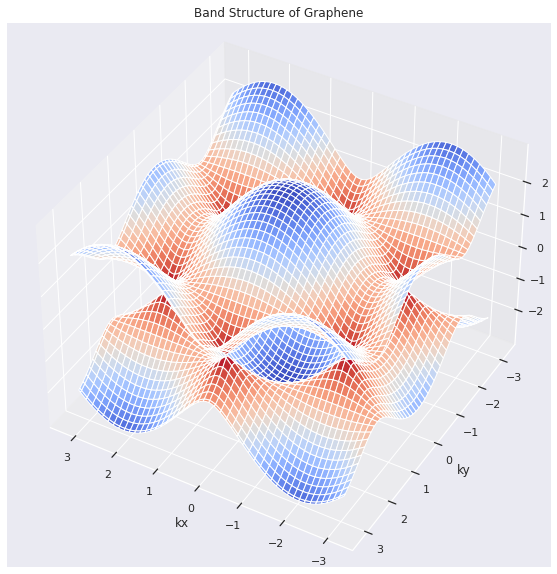

In [ ]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

kx = np.arange(-np.pi, np.pi, 0.01)
ky = np.arange(-np.pi, np.pi, 0.01)
KX,KY = np.meshgrid(kx, ky)
En = energy(KX,KY)

# Change view 
elev = 40
azim = 120
ax.view_init(elev,azim)

# Plot the 3D surface
ax.plot_surface(KX,KY,En,cmap=cm.coolwarm)
ax.plot_surface(KX,KY,-En, cmap=cm.coolwarm_r)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
# ax.contourf(KX,KY,En, zdir='z', offset=-np.pi, cmap='coolwarm')

ax.set(title="Band Structure of Graphene", xlabel='kx', ylabel='ky', zlabel='E')

plt.show()

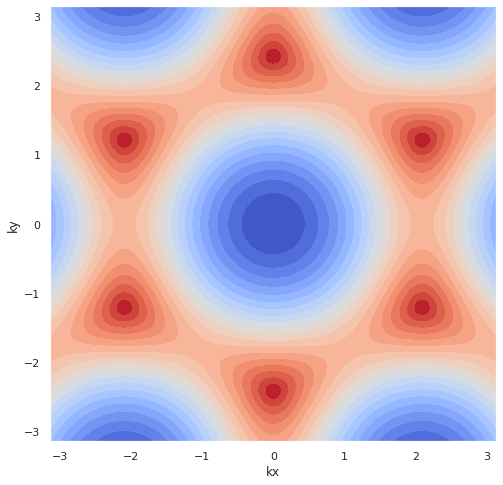

In [ ]:
ax1 = plt.figure(figsize=(8,8)).add_subplot()
ax1.contourf(KX,KY,En,20,cmap=cm.coolwarm)
ax1.set(xlabel="kx",ylabel="ky");